# Custom bluesky plan

**Objective**: 
Build a custom plan for an up-down scan using `m2` and scaler1` channels `I0` and `diode`.  Make the counting time configurable.  Accept user metadata.

First, start the instrument package.

In [1]:
from instrument.collection import *

I Thu-21:45:54 - ############################################################ startup
I Thu-21:45:54 - logging started
I Thu-21:45:54 - logging level = 10
I Thu-21:45:54 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/collection.py
I Thu-21:45:54 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Thu-21:45:54 - #### Bluesky Framework ####
I Thu-21:45:54 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_python.py
I Thu-21:45:54 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_bluesky.py
I Thu-21:45:55 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/initialize.py
I Thu-21:45:55 - using databroker catalog 'class_2021_03'
I Thu-21:45:55 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/metadata.py
I Thu-21:45:55 - #### Devices ####
I Thu-21:45:55 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/devices/area_detector.py
I Thu-21:45:55 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/devices/calculation_records.py
I Thu-21:45:59 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/devices

The scaler channels are selected by calling its `.select_channels()` method:

In [4]:
scaler1.select_channels(["I0", "diode"])

The count time is in the `.preset_time` attribute.  The way to set the scaler with this time is to use ophyd's staging process.  Add `preset_time` to the `.stage_sigs` dictionary with the desired count time as the value.

In [5]:
scaler1.stage_sigs["preset_time"] = 1
scaler1.stage_sigs

OrderedDict([('preset_time', 1)])

Create a plan that scans up, then scans down (2 scans total).  Add `temperature` just to get some other interesting data.  We'll add a metadata key for the scan direction.

In [9]:
def up_down_once(lo, hi, num, md={}):
    dets = [scaler1, temperature]
    _md = {}
    _md.update(md)
    _md["direction"] = "down"
    yield from bp.scan(dets, m2, lo, hi, num, md=_md)
    _md["direction"] = "down"
    yield from bp.scan(dets, m2, hi, lo, num, md=_md)

Verify that this code will process through the RunEngine by testing it without running it.  Use the `summarize_plan()` function imported from the `bluesky` package.  This will show the steps of the measurement.

In [10]:
summarize_plan(up_down_once(0, 1, 5))

=================================== Open Run ===================================
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================
=================================== Open Run ===================================
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================


Next, build a plan that runs this twice.

In [11]:
def up_down_twice(lo, hi, num, md={}):
    yield from up_down_once(lo, hi, num, md=md)
    yield from up_down_once(lo, hi, num, md=md)

In [12]:
summarize_plan(up_down_twice(0, 1, 5))

=================================== Open Run ===================================
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================
=================================== Open Run ===================================
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================
=================================== Open Run ===================================
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperatur

Finish the custom plan by setting the count time.  Give a default of 1.0 s.

In [16]:
def customScan(lo=0, hi=1, num=5, ct=1, md={}):
    scaler1.stage_sigs["preset_time"] = ct
    _md = {}
    _md.update(md)
    _md["count_time"] = ct
    _md["example"] = "customPlan"
    yield from up_down_twice(lo, hi, num, md=_md)

In [17]:
summarize_plan(customScan(md=dict(demo="concise custom plan example")))

=================================== Open Run ===================================
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================
=================================== Open Run ===================================
m2 -> 1.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.75
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.5
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
================================== Close Run ===================================
=================================== Open Run ===================================
m2 -> 0.0
  Read ['scaler1', 'temperature', 'm2']
m2 -> 0.25
  Read ['scaler1', 'temperatur

Run the `customScan()` plan, using the RunEngine object: `RE()`



Transient Scan ID: 297     Time: 2021-03-11 22:11:09
Persistent Unique Scan ID: '52c21701-86b4-44fa-b56f-fa4f18422eb9'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+------------+----------------------+------------+------------+
|   seq_num |       time |         m2 | temperature_readback |         I0 |      diode |
+-----------+------------+------------+----------------------+------------+------------+
|         1 | 22:11:11.7 |    0.00000 |             25.47469 |          5 |          4 |
|         2 | 22:11:13.6 |    0.25000 |             25.34451 |          4 |          3 |
|         3 | 22:11:15.7 |    0.50000 |             25.12492 |          4 |          5 |
|         4 | 22:11:17.7 |    0.75000 |             25.41479 |          6 |          4 |
|         5 | 22:11:19.6 |    1.00000 |             25.06202 |          5 |          5 |
+-----------+------------+------------+----------------------+------------+------------+
generator scan ['52c21701'] (scan

('52c21701-86b4-44fa-b56f-fa4f18422eb9',
 'ae77a3fe-543f-4a1a-a7b2-b10c743c1c68',
 'fca9c69a-653d-4777-aeea-b74f87cc2876',
 '670c8259-42b0-4e29-9b22-86b35d089f5f')

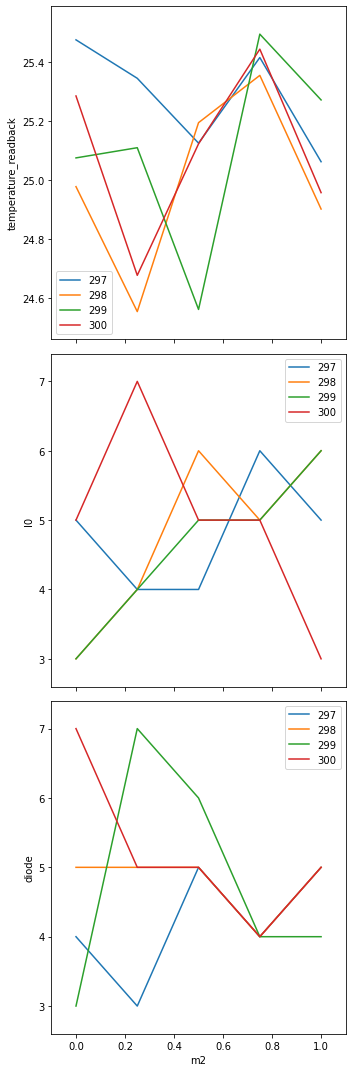

In [19]:
RE(customScan(md=dict(demo="concise custom plan example")))